
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


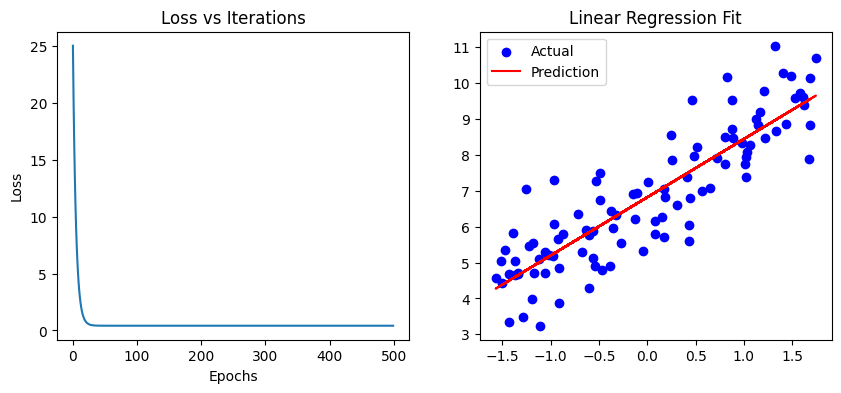

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# 1. Manual Standard Scaler
class StandardScalerManual:
    def fit(self, X):
        # Calculate mean and standard deviation for each feature (column)
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Avoid division by zero by replacing 0 std with 1 (rare edge case)
        self.std_[self.std_ == 0] = 1.0
        return self

    def transform(self, X):
        # Apply z-score normalization: (x - u) / s
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# 2. Linear Regression Manual with L2 Regularization
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []  # To store loss history

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.epochs):
            # 1. Forward pass (Prediction)
            y_pred = np.dot(X, self.weights) + self.bias

            # 2. Compute Loss (MSE + L2 Penalty)
            # MSE = (1/2N) * sum(y_pred - y)^2
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            # L2 Term = (lambda/2) * sum(w^2)
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights ** 2)
            total_loss = mse_loss + l2_loss
            self.history.append(total_loss)

            # 3. Compute Gradients
            error = y_pred - y

            # dw = (1/N) * X.T * error + lambda * w
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda * self.weights)

            # db = (1/N) * sum(error)  <- Bias is usually NOT regularized
            db = (1 / n_samples) * np.sum(error)

            # 4. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# --- Example Usage for Linear Regression ---
if __name__ == "__main__":
    # Generate synthetic regression data
    np.random.seed(42)
    X_raw = 2 * np.random.rand(100, 1)
    y_raw = 4 + 3 * X_raw.flatten() + np.random.randn(100) # y = 4 + 3x + noise

    # 1. Scale Data
    scaler = StandardScalerManual()
    X_scaled = scaler.fit_transform(X_raw)

    # 2. Train Model (with slight L2 regularization)
    model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.01)
    model.fit(X_scaled, y_raw)

    # 3. Plotting
    plt.figure(figsize=(10, 4))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(model.history)
    plt.title("Loss vs Iterations")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X_scaled, y_raw, color='blue', label='Actual')
    plt.plot(X_scaled, model.predict(X_scaled), color='red', label='Prediction')
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


Logistic Regression Accuracy: 94.00%


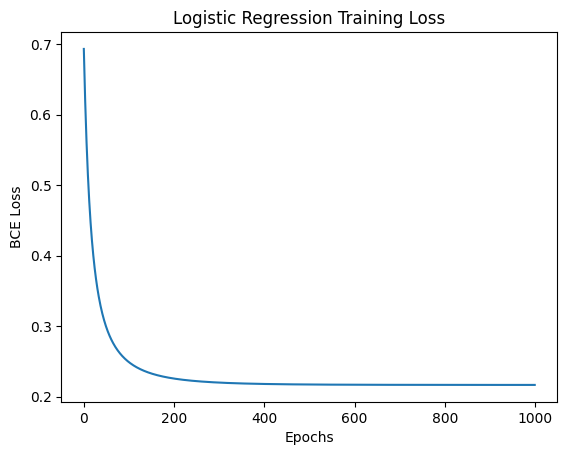

In [2]:
# 1. Sigmoid Function
def sigmoid(z):
    # Clip z to prevent overflow/underflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# 2. Logistic Regression Manual with L2
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Activation
            y_pred = sigmoid(linear_model)

            # Compute Binary Cross Entropy Loss + L2
            # Add epsilon to log to avoid log(0)
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights ** 2)
            self.loss_history.append(bce_loss + l2_loss)

            # Gradients (Calculus derivation results in same form as Linear Reg)
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(error)

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_pred_prob = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred_prob]

# --- Example Usage for Logistic Regression ---
if __name__ == "__main__":
    # Generate synthetic binary classification data
    # Class 0: centered at (-1, -1), Class 1: centered at (1, 1)
    X_class0 = np.random.randn(50, 2) - 1
    X_class1 = np.random.randn(50, 2) + 1
    X_log = np.vstack((X_class0, X_class1))
    y_log = np.hstack((np.zeros(50), np.ones(50)))

    # Scale
    scaler_log = StandardScalerManual()
    X_log_scaled = scaler_log.fit_transform(X_log)

    # Train
    log_model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
    log_model.fit(X_log_scaled, y_log)

    # Results
    preds = log_model.predict(X_log_scaled)
    acc = np.mean(preds == y_log)
    print(f"Logistic Regression Accuracy: {acc * 100:.2f}%")

    # Plot Loss
    plt.plot(log_model.loss_history)
    plt.title("Logistic Regression Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("BCE Loss")
    plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


Centroids found: [213.47368421  31.38461538 123.19444444]
Example positions for Cluster 0: [(np.int64(0), np.int64(3)), (np.int64(0), np.int64(4)), (np.int64(0), np.int64(5)), (np.int64(0), np.int64(8)), (np.int64(1), np.int64(0))] ...


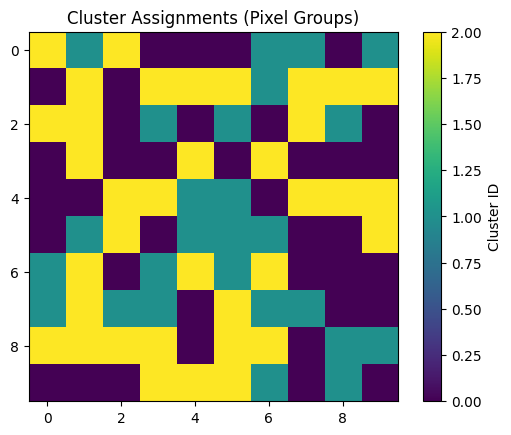

In [3]:
from sklearn.cluster import KMeans

def kmeans_matrix(M, k, max_iters=100):
    '''
    Input:
    M: The input matrix (n, m) containing values to cluster
    k: Number of clusters

    Returns:
    assignment_table: (n, m) matrix with cluster labels (0 to k-1)
    cookbook: dict {cluster_id : list of (row, col) tuples}
    centroids: numpy array of centroid values
    '''

    # 1. Flatten the matrix to treat every element as a data point
    # Shape becomes (n*m, 1) because Sklearn expects features in columns
    flat_M = M.reshape(-1, 1)

    # 2. Apply K-Means
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(flat_M)

    # 3. Get labels and reshape back to original matrix shape
    # labels_ is a 1D array of size n*m
    labels_flat = kmeans.labels_
    assignment_table = labels_flat.reshape(M.shape)

    # 4. Get Centroids
    centroids = kmeans.cluster_centers_.flatten()

    # 5. Build the "Cookbook" (Map cluster IDs to matrix positions)
    cookbook = {}
    for cluster_id in range(k):
        # np.argwhere returns a list of [row, col] arrays where condition is true
        # We convert them to a list of tuples for cleaner usage
        indices = np.argwhere(assignment_table == cluster_id)
        cookbook[cluster_id] = [tuple(idx) for idx in indices]

    return assignment_table, cookbook, centroids

# --- Example Usage for K-Means ---
if __name__ == "__main__":
    # Create a random matrix
    M = np.random.randint(0, 255, size=(10, 10)) # Imagine a 10x10 grayscale image block

    # Cluster into k=3 groups (e.g., Dark, Medium, Light pixels)
    assign_table, book, centers = kmeans_matrix(M, k=3)

    print(f"Centroids found: {centers}")
    print(f"Example positions for Cluster 0: {book[0][:5]} ...") # Print first 5

    # Visualize assignment table
    plt.imshow(assign_table, cmap='viridis')
    plt.title("Cluster Assignments (Pixel Groups)")
    plt.colorbar(label="Cluster ID")
    plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
